In [18]:
from vae.scripts.models.variational_autoencoder import VAE


import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Load the VAE model
model = VAE()  # Make sure this matches your VAE architecture
model.load_state_dict(torch.load(r'C:\Users\User\Desktop\thesis\vae\saved models\autoencoder.pth'))
model.eval()


VAE(
  (encoder): Sequential(
    (0): Linear(in_features=8, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=16, bias=True)
  )
  (fc_mu): Linear(in_features=16, out_features=16, bias=True)
  (fc_logvar): Linear(in_features=16, out_features=16, bias=True)
  (decoder): Sequential(
    (0): Linear(in_features=16, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=8, bias=True)
  )
)

In [27]:
def generate_data(num_samples=1000):
    data = []

    d =   [1,1,1,1,1] # Lengths d1, d2, d3, d4, d5
   
    phi = np.random.uniform(0, 2*np.pi, size=4)  # Angles phi1, phi2, phi3, phi4
    x = np.zeros((4, 2))  # Assume 2D for simplicity
    x[0] = [d[0] * np.cos(phi[0]), d[0] * np.sin(phi[0])]
    x[1] = x[0] + [d[1] * np.cos(phi[1]), d[1] * np.sin(phi[1])]
    x[2] = x[1] + [d[2] * np.cos(phi[2]), d[2] * np.sin(phi[2])]
    x[3] = x[2] + [d[3] * np.cos(phi[3]), d[3] * np.sin(phi[3])]

    return x



In [28]:
data = generate_data(num_samples=1)
input_point = data.reshape(-1)

input_tensor = torch.tensor(input_point, dtype=torch.float32).unsqueeze(0)

# Encode the input
mu, log_var = model.encode(input_tensor)
encoded = model.reparameterize(mu, log_var).detach().numpy()

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Plot function
def plot_points(original, modified_points, values_to_add, title):
    plt.figure(figsize=(10, 6))
    
    # Plotting the original points with bold blue line
    plt.plot(original[::2], original[1::2], 'bo-', label='Original', markersize=10, linewidth=2)
    
    # Starting point (0,0)
    plt.plot(0, 0, 'ko', markersize=10)  # Plots the point (0,0)
    
    colors = plt.cm.rainbow(np.linspace(0, 1, len(modified_points)))
    for i, points in enumerate(modified_points):
        # Connect (0,0) to the first point of each set of modified points
        plt.plot([0, points[0]], [0, points[1]], 'k--', alpha=0.5)  # Dashed line to first point of each reconstruction
        
        # Adjust style based on whether the modification is zero
        if values_to_add[i] == 0.0:
            plt.plot(points[::2], points[1::2], 'o-', color='black', label='Modified z by 0', markersize=8, linewidth=2)
        else:
            plt.plot(points[::2], points[1::2], 'o-', color=colors[i], label=f'Modified z by {values_to_add[i]}', markersize=5)
    
    plt.legend()
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.show()



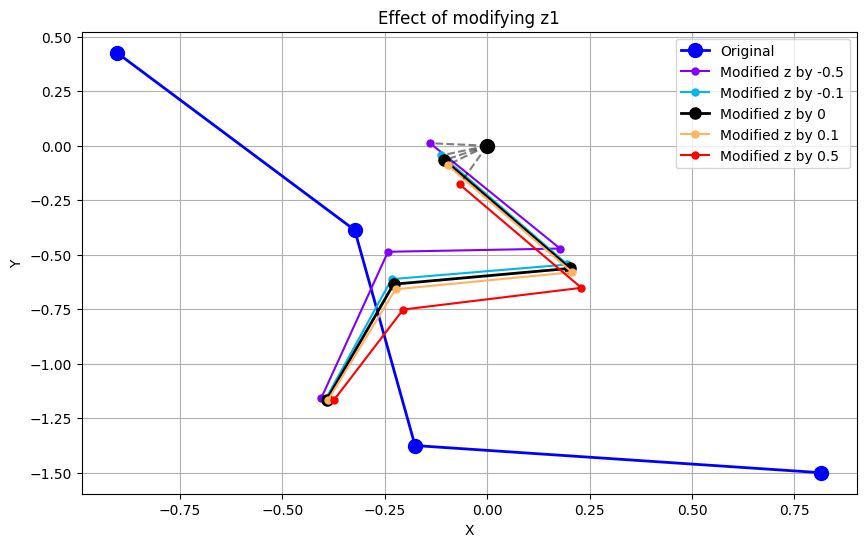

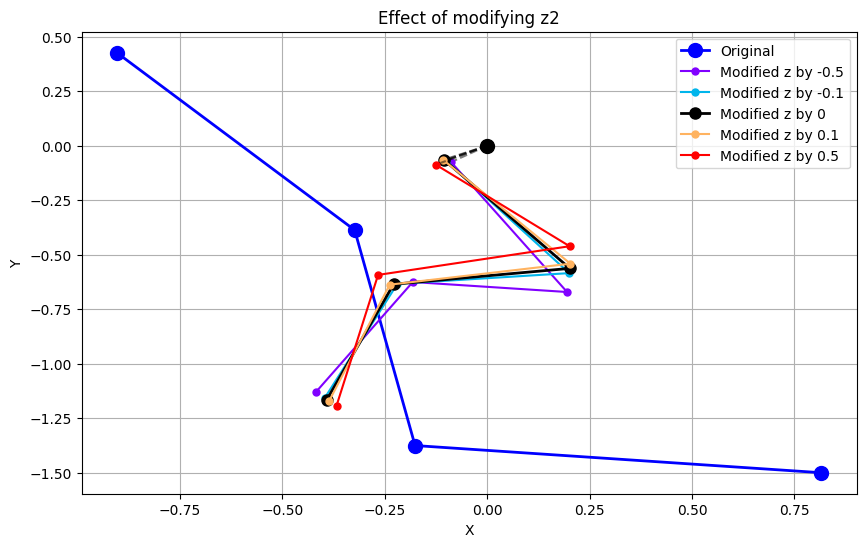

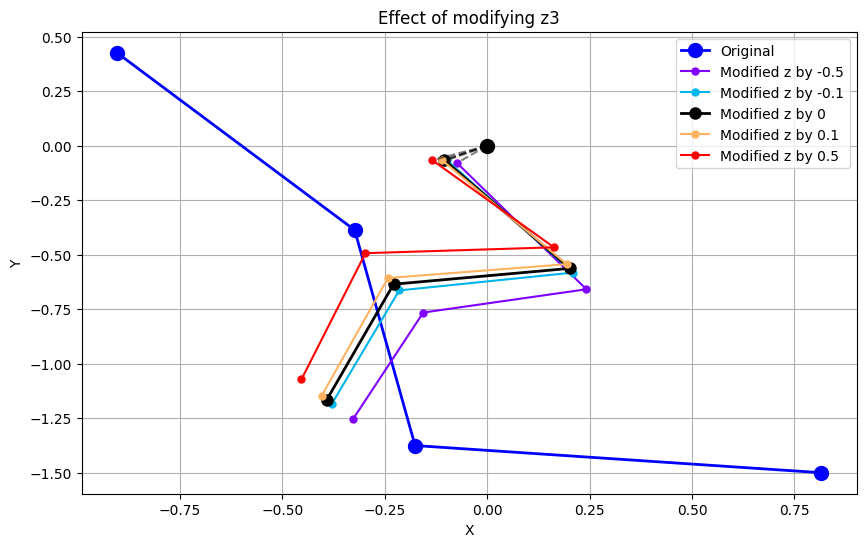

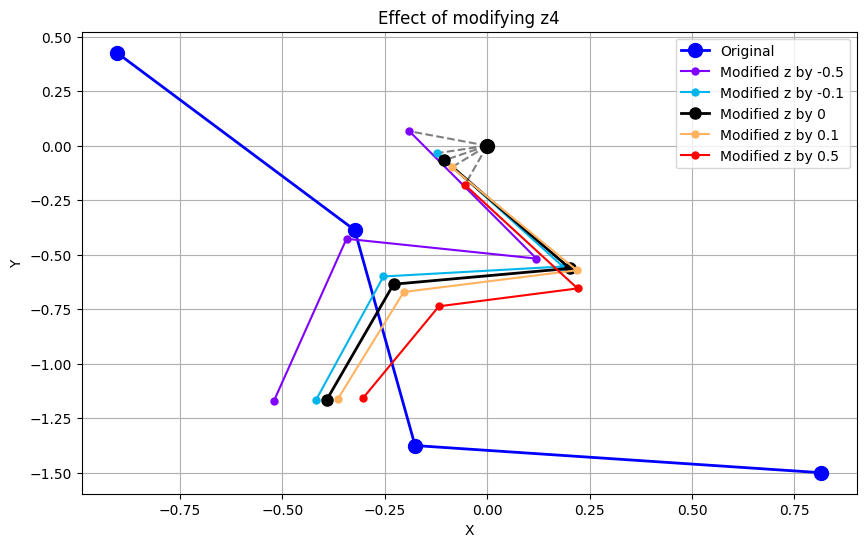

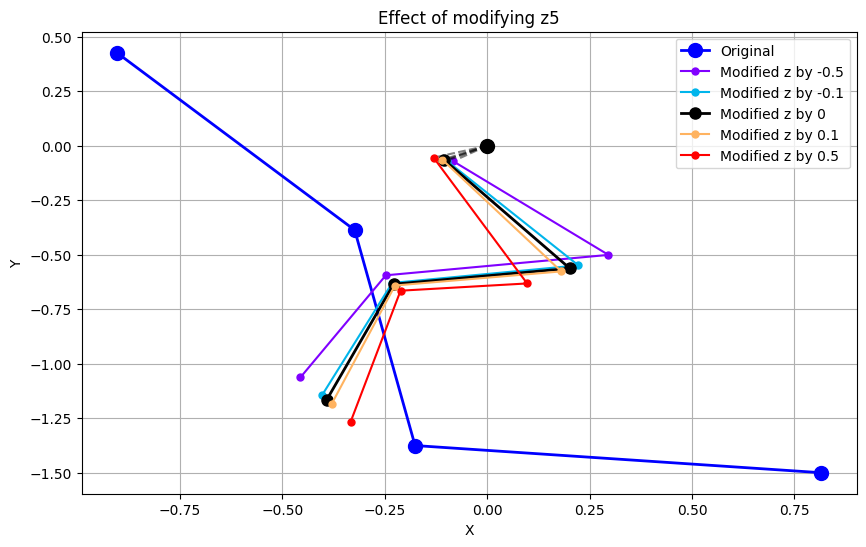

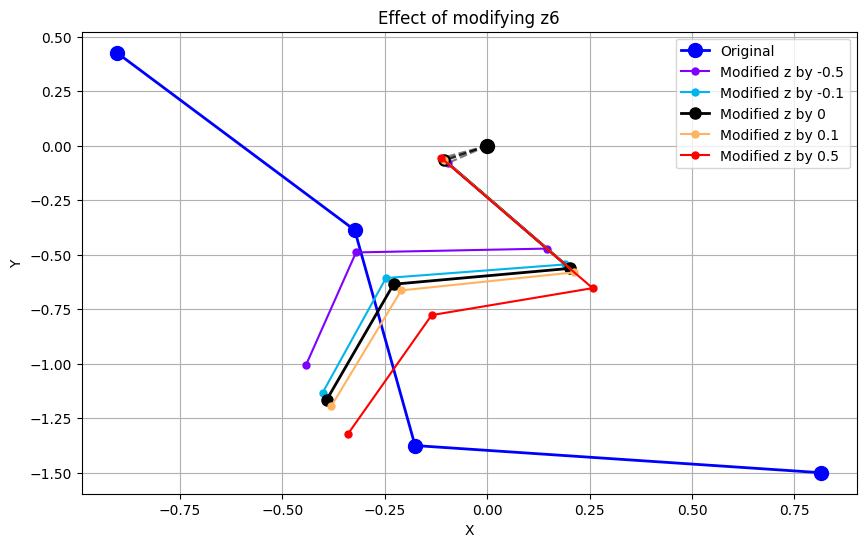

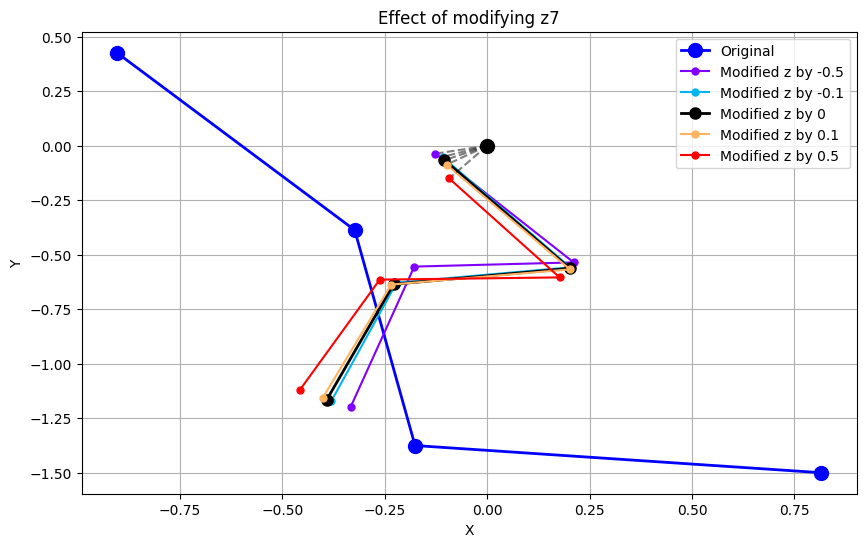

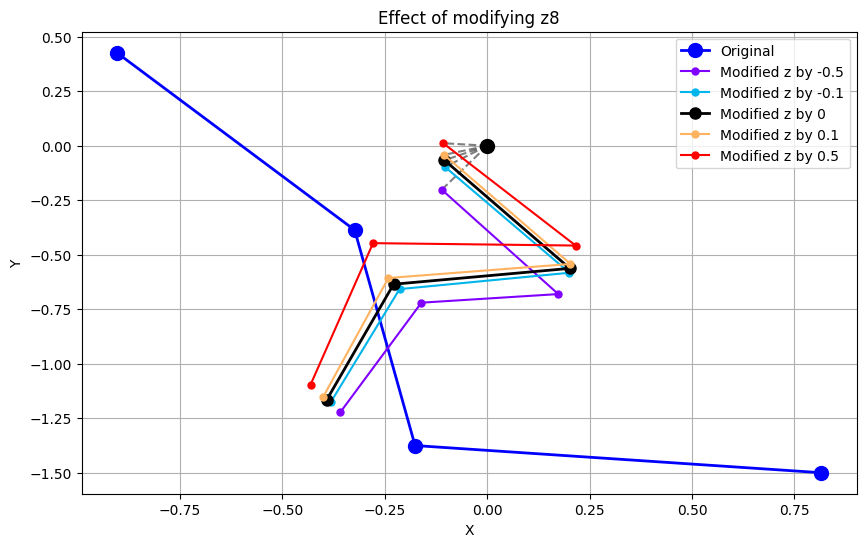

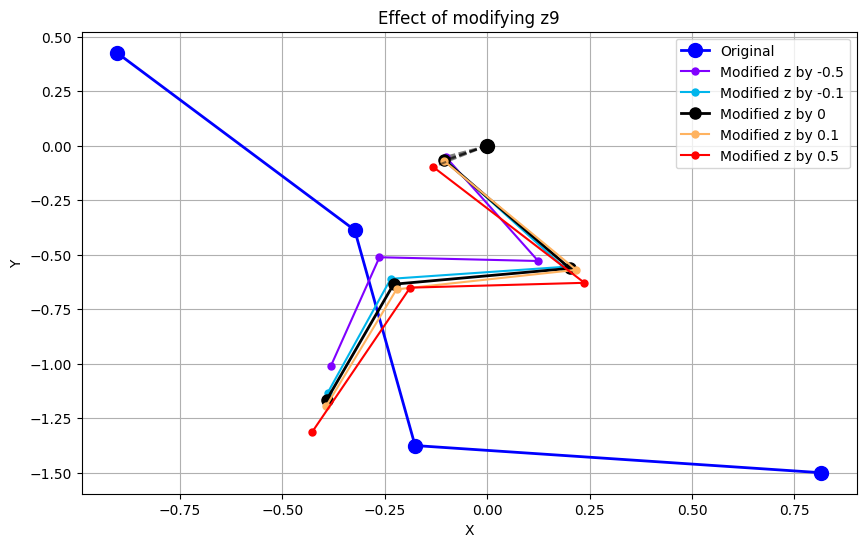

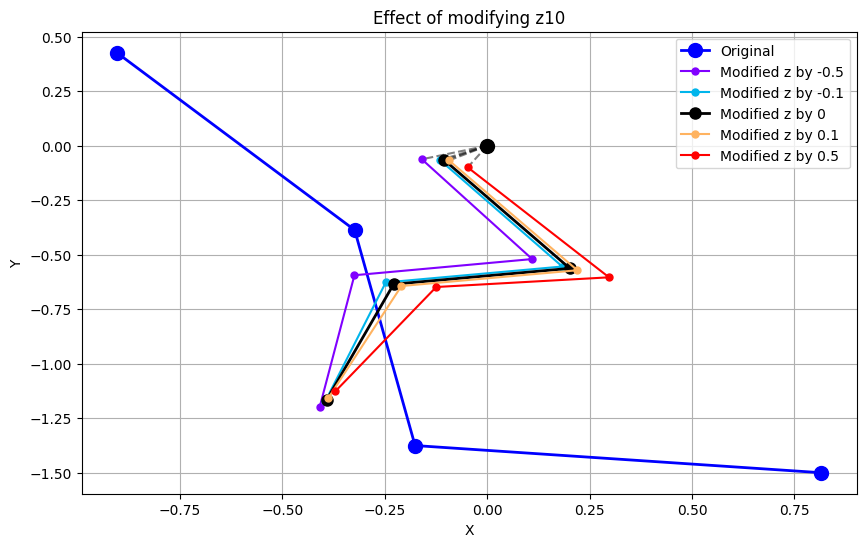

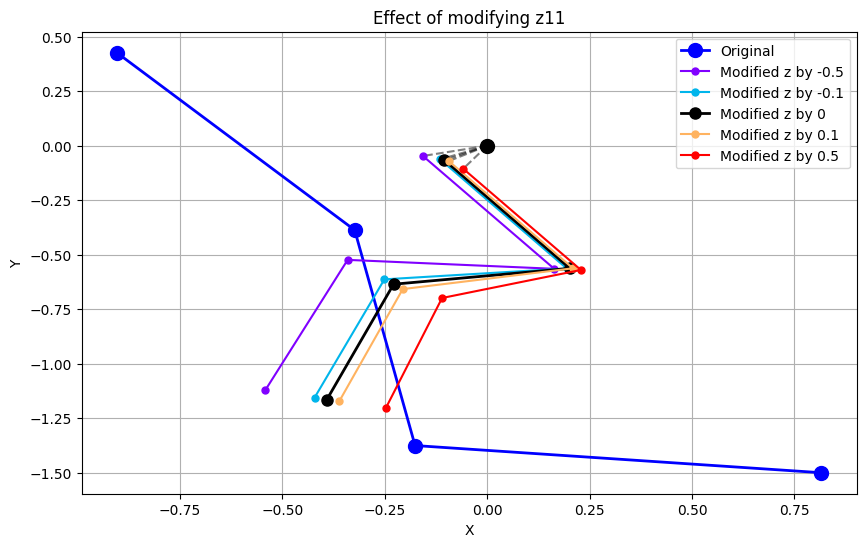

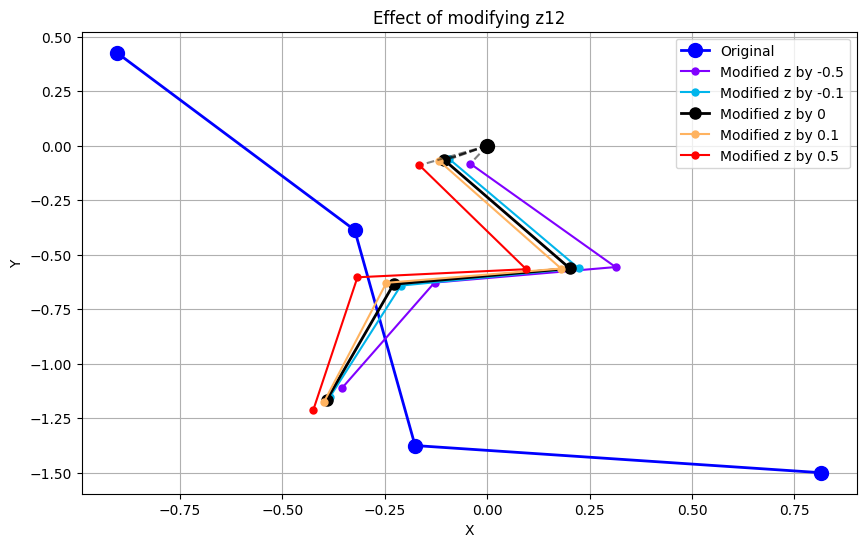

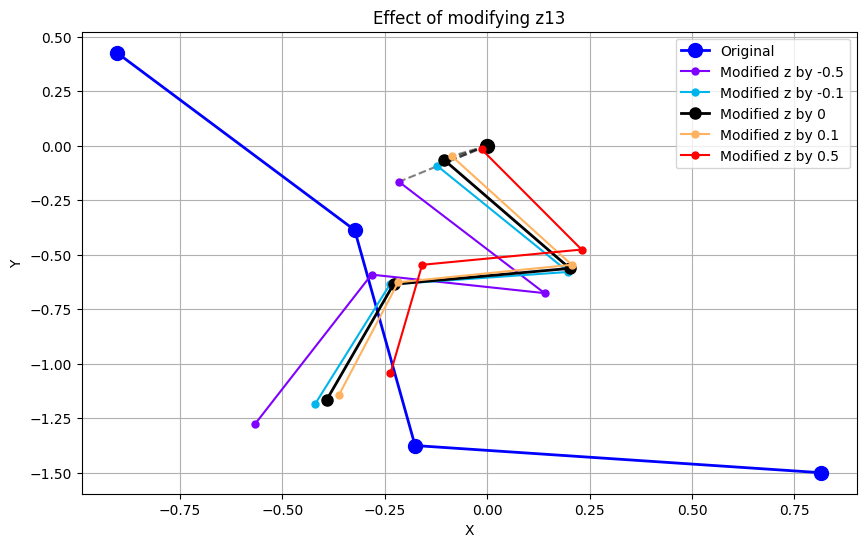

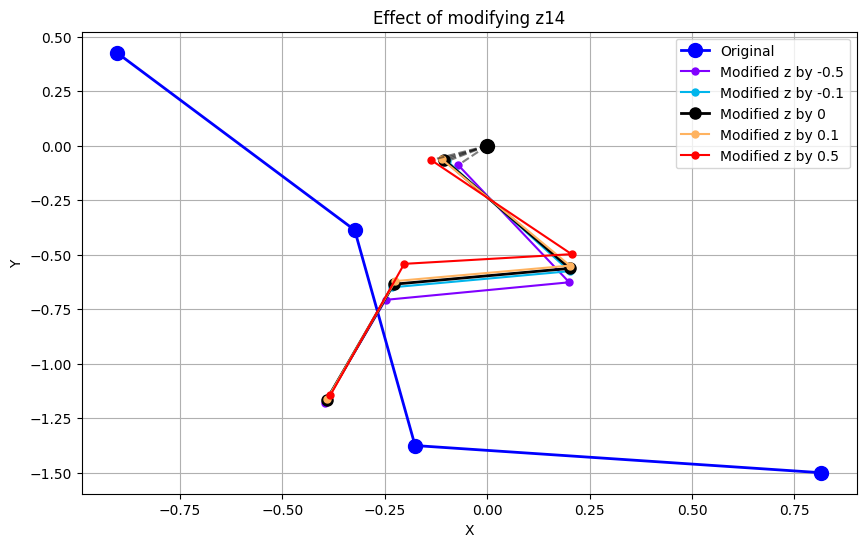

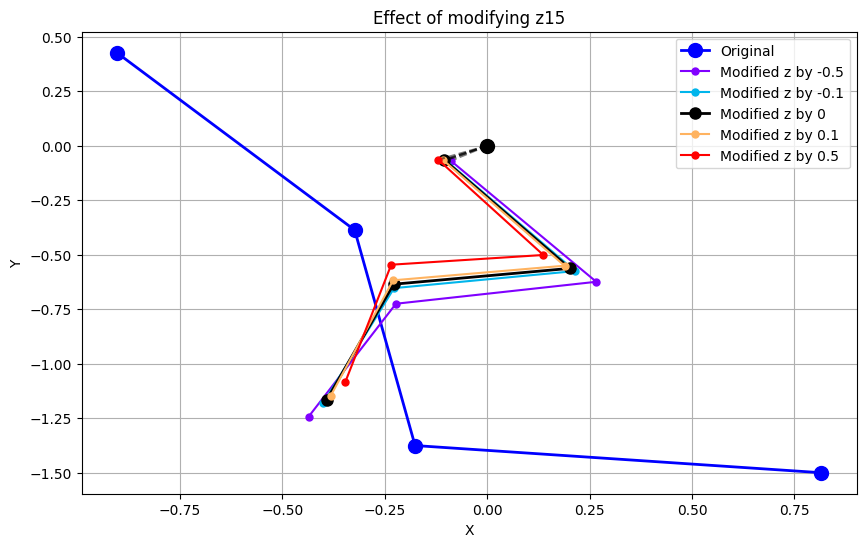

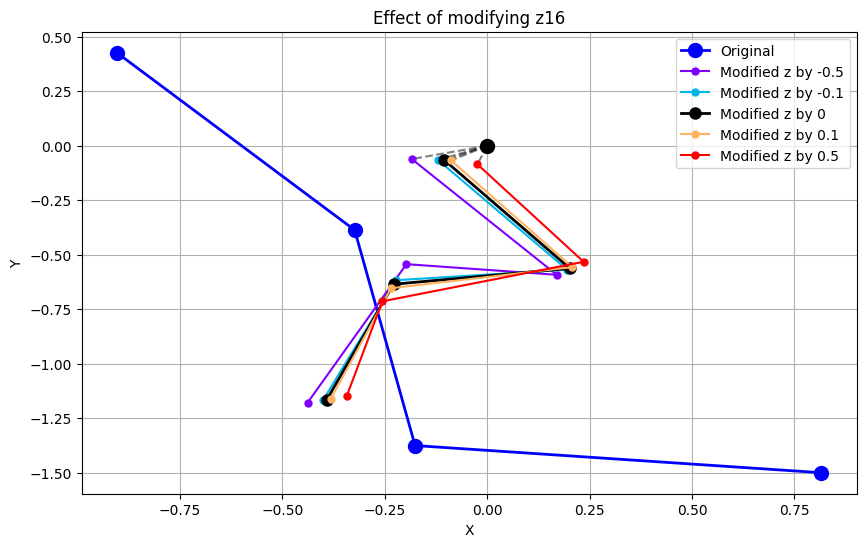

In [30]:
values_to_add = [-0.5, -0.1, 0.0, 0.1, 0.5]
for i in range(encoded.shape[1]):
    modified_points = []
    for val in values_to_add:
        modified_encoded = encoded.copy()
        modified_encoded[0, i] += val  # Change the latent variable
        modified_tensor = torch.tensor(modified_encoded, dtype=torch.float32)
        decoded = model.decode(modified_tensor).detach().numpy()
        modified_points.append(decoded.flatten())
    plot_points(input_point, modified_points, values_to_add, f"Effect of modifying z{i+1}")
